In [1]:
import pandas as pd

In [35]:
data = pd.read_csv('ipl.csv')
data.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24108\2579320451.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ipl.csv')


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False
5,131975,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,...,2,5,0,NaN,0,4,0,"('BB McCullum', 'SC Ganguly')",NaN,False
6,131976,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,...,3,6,0,NaN,0,5,0,"('BB McCullum', 'SC Ganguly')",NaN,False
7,131977,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,...,3,7,0,NaN,0,6,0,"('BB McCullum', 'SC Ganguly')",NaN,False
8,131978,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,...,7,8,0,NaN,4,7,0,"('BB McCullum', 'SC Ganguly')",NaN,False
9,131979,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,...,11,9,0,NaN,8,8,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [36]:
data.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [48]:
data['season'].unique()

array(['2007/08', '2009', 2009, '2009/10', '2011', 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, '2019', '2020/21', '2021', 2021,
       2022, 2023, 2024, 2025], dtype=object)

In [50]:
data['season'] = (
    data['season']
    .astype(str)
    .str.extract(r'(\d{4})')
    .astype(int)
)
data['season'].unique()

array([2007, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025])

In [37]:
#find every batsman for every season which has more than 400 season runs and bowler who has more than 12 season wickets

In [51]:
run_data = data.groupby(['match_id', 'season', 'batter']).agg({
    'runs_batter': 'sum'
})
run_data = run_data.reset_index()

run_data.head(5)


,match_id,season,batter,runs_batter
0,335982,2007,AA Noffke,9
1,335982,2007,B Akhil,0
2,335982,2007,BB McCullum,158
3,335982,2007,CL White,6
4,335982,2007,DJ Hussey,12


In [54]:
season_runs = (run_data.groupby(['season', 'batter'])['runs_batter'].sum()
.reset_index()
)

season_runs.head(5)



,season,batter,runs_batter
0,2007,A Chopra,42
1,2007,A Kumble,13
2,2007,A Mishra,37
3,2007,A Mukund,0
4,2007,A Nehra,3


In [71]:
morethan_400 = season_runs[season_runs['runs_batter'] > 400].sort_values(by=['season','runs_batter'], ascending=[True,True])
morethan_400.head(20)

,season,batter,runs_batter
95,2007,RG Sharma,404
139,2007,V Sehwag,406
76,2007,MS Dhoni,414
116,2007,SK Raina,421
149,2007,YK Pathan,435
10,2007,AC Gilchrist,436
40,2007,GC Smith,441
124,2007,SR Watson,472
126,2007,ST Jayasuriya,514
39,2007,G Gambhir,534


In [62]:
wicket_data = data.groupby(['match_id', 'season', 'bowler']).agg({
    'bowler_wicket': 'sum'
})
wicket_data = wicket_data.reset_index()

wicket_data.head(5)

,match_id,season,bowler,bowler_wicket
0,335982,2007,AA Noffke,1
1,335982,2007,AB Agarkar,3
2,335982,2007,AB Dinda,2
3,335982,2007,CL White,0
4,335982,2007,I Sharma,1


In [64]:
season_wickets = (wicket_data.groupby(['season', 'bowler'])['bowler_wicket'].sum()
.reset_index()
)

season_wickets.head(5)

,season,bowler,bowler_wicket
0,2007,A Kumble,7
1,2007,A Mishra,11
2,2007,A Nehra,12
3,2007,A Nel,1
4,2007,A Symonds,0


In [68]:
morethan_12 = season_wickets[season_wickets['bowler_wicket'] > 12].sort_values(by=['season','bowler_wicket'], ascending=[True,True])
morethan_12.head(40)

,season,bowler,bowler_wicket
76,2007,SK Trivedi,13
97,2007,Z Khan,13
50,2007,MM Patel,14
34,2007,IK Pathan,15
49,2007,MF Maharoof,15
65,2007,RP Singh,15
91,2007,VY Mahesh,16
36,2007,JA Morkel,17
51,2007,MS Gony,17
58,2007,PP Chawla,17


In [ ]:
# I want to make a visulization of a data in which I want to show how many times a batter from the data 'morethan_400' has been out by a bowler from data 'morethan_12'

In [89]:
wickets_data = data[data['bowler_wicket'] == 1]
wickets_data.head()

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
33,132003,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,...,61,32,1,NaN,10,12,1,"('BB McCullum', 'SC Ganguly')",RT Ponting,True
74,132044,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,...,112,73,2,NaN,20,20,1,"('BB McCullum', 'RT Ponting')",DJ Hussey,True
106,132076,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,...,172,103,3,NaN,12,12,1,"('BB McCullum', 'DJ Hussey')",Mohammad Hafeez,True
131,132101,335982,2008-04-18,T20,Indian Premier League,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,...,4,7,1,NaN,2,3,1,"('R Dravid', 'W Jaffer')",V Kohli,True
138,132108,335982,2008-04-18,T20,Indian Premier League,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,...,9,14,2,NaN,1,5,1,"('V Kohli', 'W Jaffer')",JH Kallis,True


In [90]:
batter_match = pd.merge(wickets_data, morethan_400, on=['season', 'batter'], how='inner')
batter_match.head()


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out,runs_batter_y
0,132239,335983,2008-04-19,T20,Indian Premier League,1,Chennai Super Kings,Kings XI Punjab,7,1,...,43,3,NaN,2,3,1,"('MEK Hussey', 'MS Dhoni')",SK Raina,True,414
1,133719,335989,2008-04-23,T20,Indian Premier League,1,Chennai Super Kings,Mumbai Indians,19,5,...,119,5,NaN,30,16,1,"('JDP Oram', 'MS Dhoni')",S Badrinath,True,414
2,135380,335996,2008-04-28,T20,Indian Premier League,1,Chennai Super Kings,Royal Challengers Bangalore,19,5,...,119,4,NaN,65,30,1,"('MEK Hussey', 'MS Dhoni')",JDP Oram,True,414
3,136588,336001,2008-05-02,T20,Indian Premier League,1,Chennai Super Kings,Delhi Daredevils,17,1,...,103,4,NaN,32,27,1,"('JA Morkel', 'MS Dhoni')",SK Raina,True,414
4,137496,336005,2008-05-04,T20,Indian Premier League,1,Chennai Super Kings,Rajasthan Royals,7,5,...,47,5,NaN,1,7,1,"('MS Dhoni', 'SK Raina')",JA Morkel,True,414


In [91]:
final_data = pd.merge(batter_match, morethan_12, on=['season', 'bowler'], how='inner')
final_data.head()

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket_x,batting_partners,next_batter,striker_out,runs_batter_y,bowler_wicket_y
0,135380,335996,2008-04-28,T20,Indian Premier League,1,Chennai Super Kings,Royal Challengers Bangalore,19,5,...,4,NaN,65,30,1,"('MEK Hussey', 'MS Dhoni')",JDP Oram,True,414,13
1,143921,336034,2008-05-03,T20,Indian Premier League,2,Deccan Chargers,Royal Challengers Bangalore,3,5,...,1,NaN,10,11,1,"('AC Gilchrist', 'VVS Laxman')",HH Gibbs,True,436,13
2,134490,335992,2008-04-26,T20,Indian Premier League,2,Rajasthan Royals,Royal Challengers Bangalore,3,2,...,2,NaN,21,12,1,"('GC Smith', 'YK Pathan')",SR Watson,True,435,13
3,135860,335998,2008-04-30,T20,Indian Premier League,1,Delhi Daredevils,Royal Challengers Bangalore,18,2,...,5,NaN,86,54,1,"('G Gambhir', 'MK Tiwary')",R Bhatia,True,534,13
4,137870,336006,2008-05-05,T20,Indian Premier League,2,Kings XI Punjab,Royal Challengers Bangalore,14,2,...,4,NaN,39,34,1,"('DPMD Jayawardene', 'SE Marsh')",IK Pathan,True,616,13


In [97]:
dismissal_counts = final_data.groupby(['season','batter', 'bowler']).size().reset_index(name='dismissals')
dismissal_counts.head(10)

,season,batter,bowler,dismissals
0,2007,AC Gilchrist,IK Pathan,1
1,2007,AC Gilchrist,JA Morkel,1
2,2007,AC Gilchrist,MS Gony,1
3,2007,AC Gilchrist,SK Trivedi,1
4,2007,AC Gilchrist,Z Khan,1
5,2007,G Gambhir,MS Gony,1
6,2007,G Gambhir,RP Singh,1
7,2007,G Gambhir,SK Trivedi,1
8,2007,G Gambhir,SR Watson,1
9,2007,G Gambhir,Z Khan,1


In [95]:

total_dismissals = dismissal_counts.groupby(['season', 'batter'])['dismissals'].sum().reset_index()
total_dismissals = total_dismissals.sort_values(by=['season', 'batter'])
total_dismissals.head(20)

,season,batter,dismissals
0,2007,AC Gilchrist,5
1,2007,G Gambhir,5
2,2007,GC Smith,2
3,2007,MS Dhoni,4
4,2007,RG Sharma,2
5,2007,SE Marsh,2
6,2007,SK Raina,4
7,2007,SR Watson,1
8,2007,ST Jayasuriya,5
9,2007,V Sehwag,5


In [111]:
print(total_dismissals['season'].value_counts().sort_index())


season
2007    11
2009    33
2011    10
2012    12
2013    17
2014    10
2015    11
2016     9
2017     6
2018    16
2019    16
2020    15
2021    12
2022    16
2023    16
2024    18
2025    17
Name: count, dtype: int64


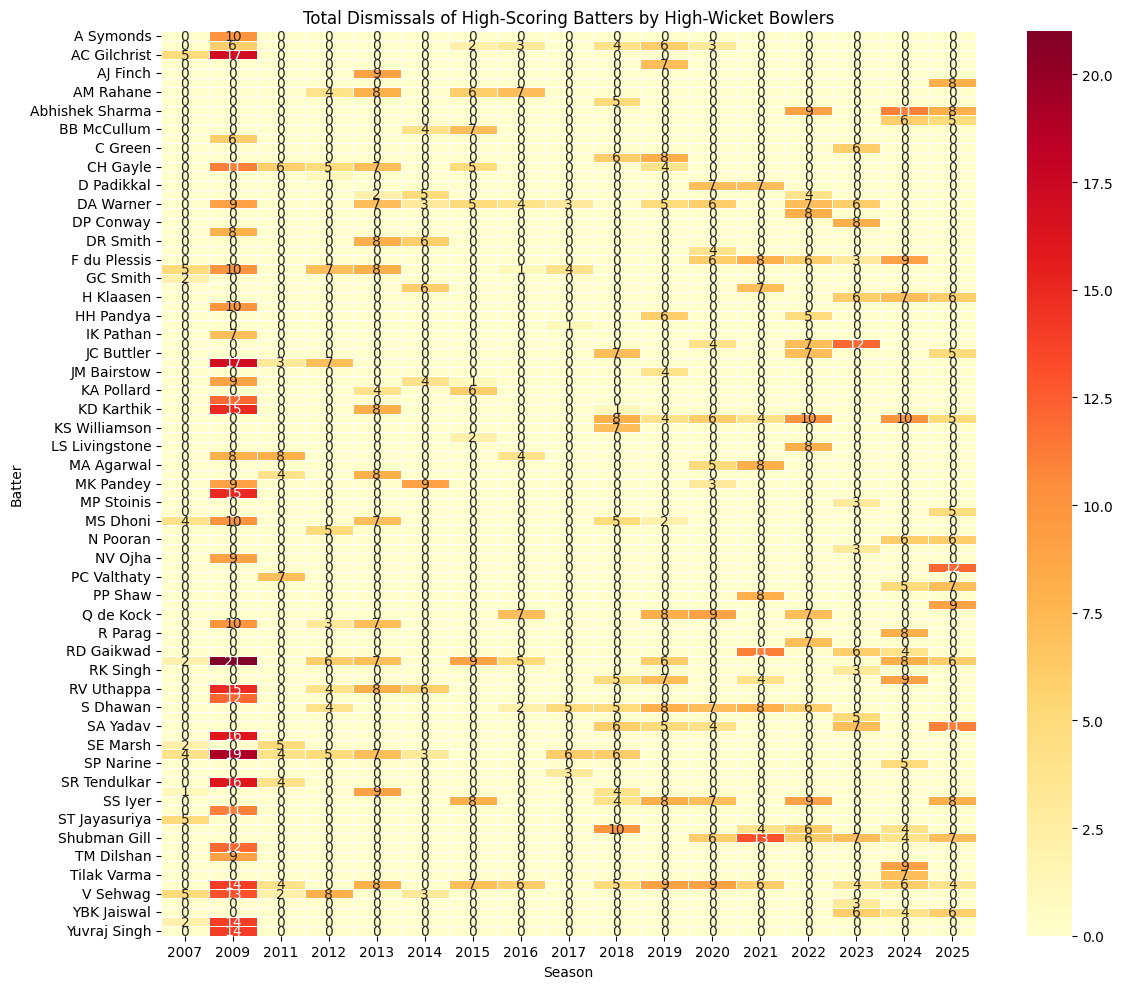

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = total_dismissals.pivot(index='batter', columns='season', values='dismissals')

heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g', linewidths=.5)

plt.title('Total Dismissals of High-Scoring Batters by High-Wicket Bowlers')
plt.xlabel('Season')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24108\2556818023.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = heatmap_data.fillna(0).applymap(lambda x: str(int(x)) if x > 0 else '')


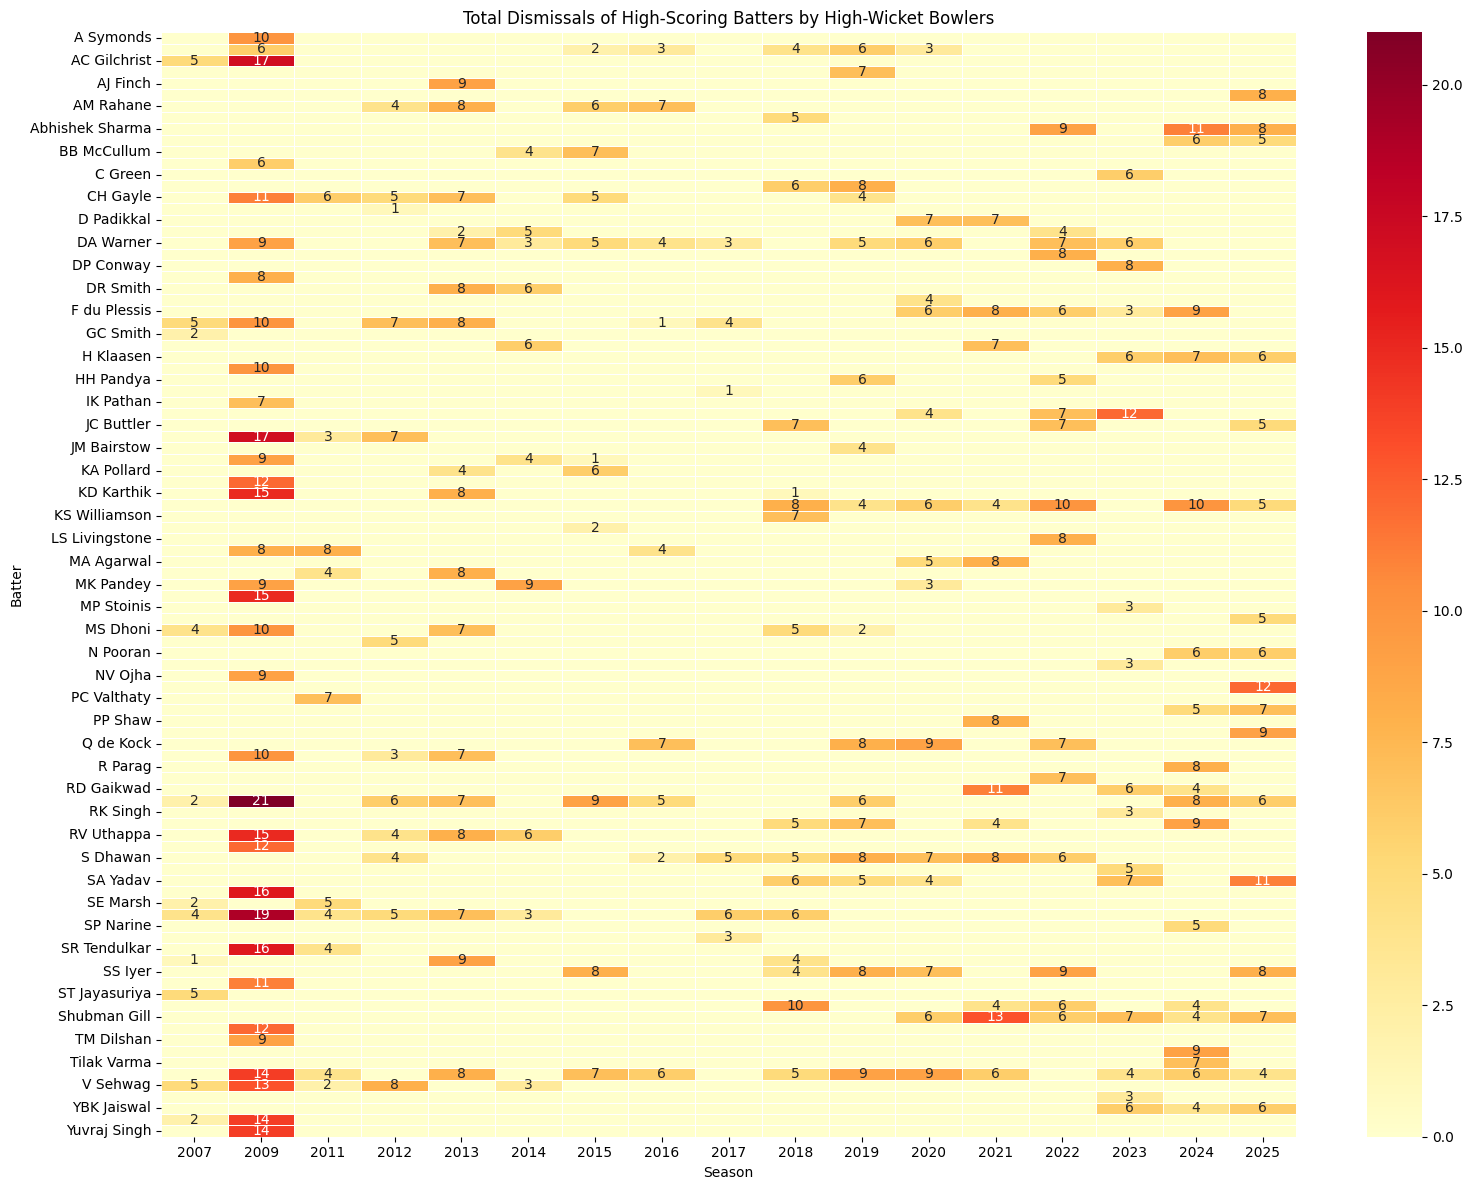

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

labels = heatmap_data.fillna(0).applymap(lambda x: str(int(x)) if x > 0 else '')

sns.heatmap(heatmap_data, cmap='YlOrRd', annot=labels, fmt='', linewidths=.5)

plt.title('Total Dismissals of High-Scoring Batters by High-Wicket Bowlers')
plt.xlabel('Season')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()